In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets


## 1- Load and prepare Data

In [2]:
raw_data = datasets.load_digits()

In [3]:
len(raw_data.images)

1797

In [4]:
raw_data.images[:1]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [5]:
raw_data.images[1].shape

(8, 8)

1

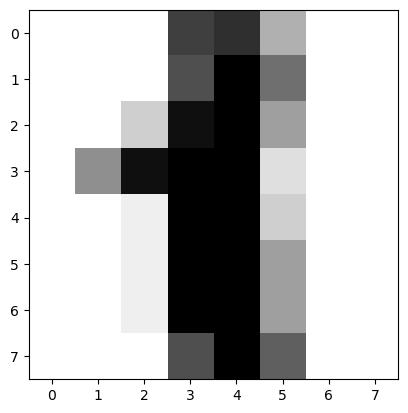

In [6]:
plt.imshow(raw_data.images[1], cmap='gray_r')
raw_data.target[1]

In [7]:
data = list(zip(raw_data.images, raw_data.target))

In [8]:
data[285][1]

9

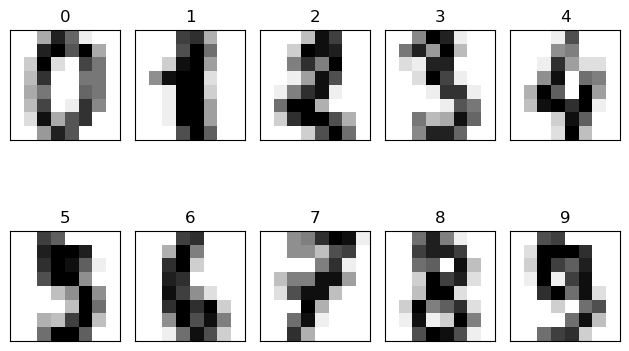

In [9]:
for i, (image, label) in enumerate(data[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.tight_layout()


In [10]:
raw_data.images.shape

(1797, 8, 8)

In [11]:
# Flatten Image:
X = raw_data.images.reshape(len(raw_data.images), -1)

In [12]:
X.shape

(1797, 64)

In [13]:
y = raw_data.target

In [14]:
y.shape

(1797,)

In [15]:
data = list(zip(X, raw_data.target))

In [16]:
data[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X.max()

16.0

In [20]:
X_scaled.max()

1.0

## 2- KNN Classifier


### KNN Application


### Pros


### CONS:

<br/>

* [1]
* [2]


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=20, leaf_size=3)

In [23]:
knn_classifier.fit(X[:1000], y[:1000])

KNeighborsClassifier(leaf_size=3, n_neighbors=20)

In [24]:
X[1100].shape

(64,)

In [25]:
knn_classifier.predict(X[1100].reshape(1,-1))

array([9])

In [26]:
raw_data.target[1100]

9

In [27]:
knn_classifier.predict(X[1100:1110])

array([9, 5, 2, 8, 2, 0, 0, 1, 7, 6])

In [28]:
raw_data.target[1100:1110]

array([9, 5, 2, 8, 2, 0, 0, 1, 7, 6])

## 3- Evaluation (For Classification problems):

In [35]:
# Predicted Labels
pred = knn_classifier.predict(X[1000:])

In [36]:
# Expectec labels
test_labels = y[1000:]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(classification_report(pred, test_labels))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.97      0.94      0.96        83
           2       0.94      0.99      0.96        73
           3       0.90      0.89      0.89        80
           4       0.96      0.99      0.98        81
           5       0.98      0.87      0.92        92
           6       1.00      0.98      0.99        82
           7       1.00      0.93      0.96        86
           8       0.82      0.97      0.89        64
           9       0.90      0.97      0.94        75

    accuracy                           0.95       797
   macro avg       0.95      0.95      0.95       797
weighted avg       0.95      0.95      0.95       797



In [39]:
print(confusion_matrix(pred, test_labels))

[[78  0  1  0  1  0  0  0  0  1]
 [ 0 78  0  0  0  0  0  0  5  0]
 [ 0  0 72  0  0  0  0  0  1  0]
 [ 0  0  4 71  0  0  0  0  2  3]
 [ 1  0  0  0 80  0  0  0  0  0]
 [ 0  1  0  3  0 80  0  0  4  4]
 [ 0  0  0  0  0  2 80  0  0  0]
 [ 0  0  0  4  1  0  0 80  1  0]
 [ 0  0  0  1  1  0  0  0 62  0]
 [ 0  1  0  0  0  0  0  0  1 73]]


<Axes: >

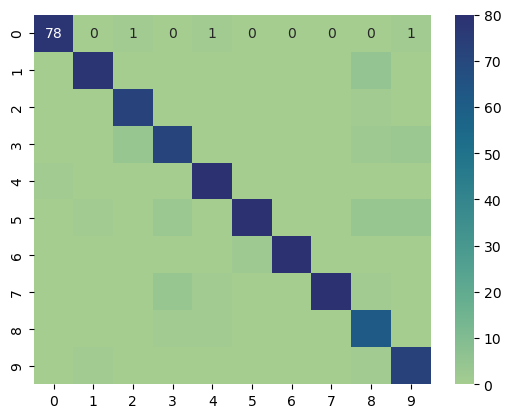

In [40]:
sns.heatmap(confusion_matrix(pred, test_labels), annot=True, cmap='crest')